Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [2]:
!pip install pymystem3

In [1]:
import re

In [3]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [7]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [8]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [9]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [10]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [11]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [12]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [13]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [14]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [15]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [16]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [17]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [18]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [19]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [20]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [21]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [22]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [34]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [35]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [36]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [37]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [27]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [42]:
from pymystem3 import Mystem

mystem = Mystem()
analyzed = mystem.analyze(text_rus)

tagged_tokens = process_mystem_analysis(analyzed)
print(tagged_tokens)



['и_CONJ', 'пунша_S', 'пламень_S', 'голубой_A', 'люблю_V', 'воинственную_A', 'живость_S', 'потешных_A', 'марсовых_S', 'полей_S', 'пехотных_A', 'ратей_S', 'и_CONJ', 'коней_S', 'однообразную_A', 'красивость_S', 'в_PR', 'их_APRO', 'стройно_ADV', 'зыблемом_V', 'строю_S', 'лоскутья_S', 'сих_APRO', 'знамён_S', 'победных_A', 'сиянье_S', 'шапок_S', 'этих_APRO', 'медных_A', 'насквозь_ADV', 'простреленных_V', 'в_PR', 'бою_S']


Можно "подклеить" для удобства тэги к слову.

In [29]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [30]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

FileNotFoundError: [Errno 2] No such file or directory: 'text_morph.txt'

In [31]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

NameError: name 'txt' is not defined

Сколько у нас частей речи определенного вида?

In [32]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

NameError: name 'resulting_text' is not defined

In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [46]:
stop_words = set(stopwords.words("english"))

NameError: name 'stopwords' is not defined

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [43]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


NameError: name 'tokenized_txt' is not defined

In [44]:
frequency_distribution_2.plot(30, cumulative=False)

NameError: name 'frequency_distribution_2' is not defined

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Английский текст: 1399 символов
Русский текст: 1488 символов


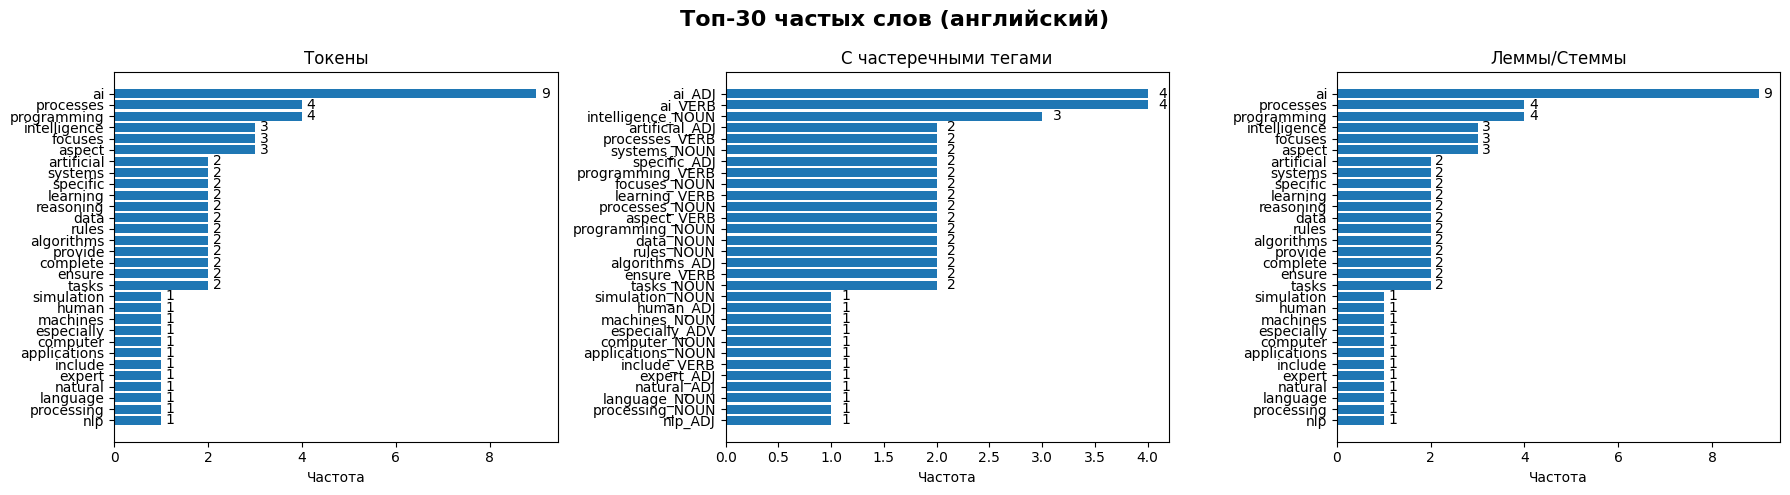


Сравнение топ-10 слов для английский:
------------------------------------------------------------
Метод                Топ-10 слов
------------------------------------------------------------
Токены               ai, processes, programming, intelligence, focuses...
С тегами             ai_ADJ, ai_VERB, intelligence_NOUN, artificial_ADJ, processes_VERB...
Леммы                ai, processes, programming, intelligence, focuses...

Общие слова во всех трех методах: 0


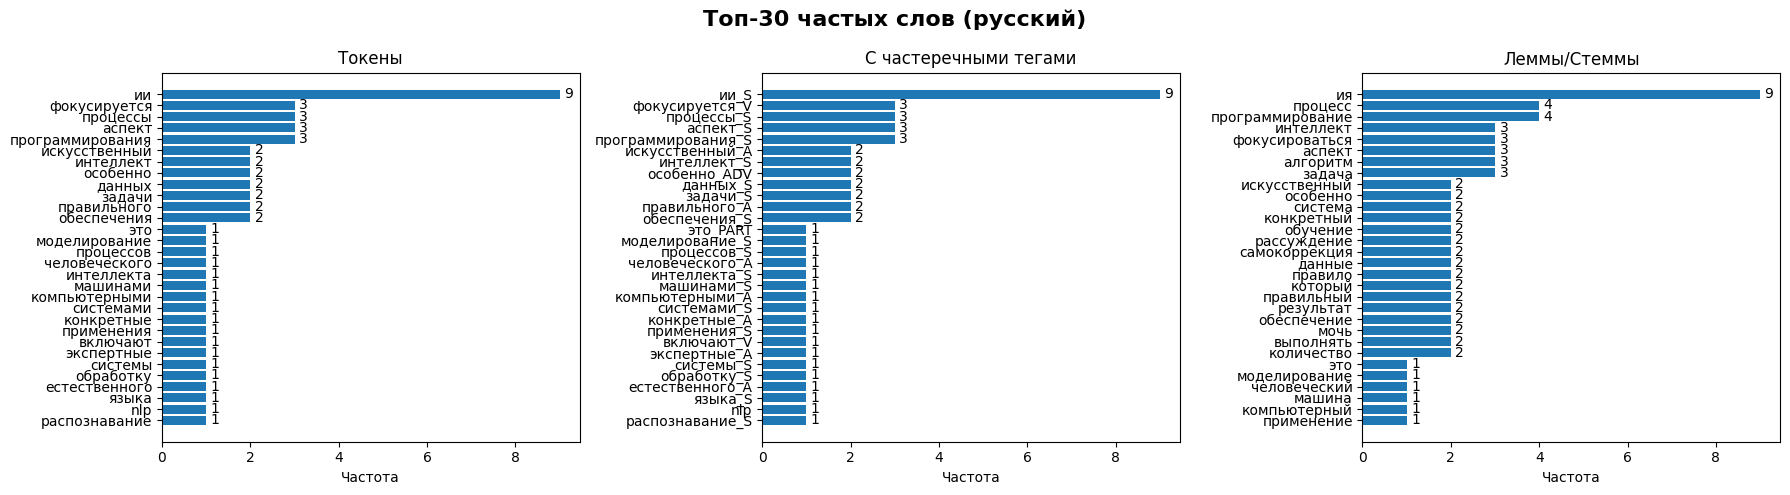


Сравнение топ-10 слов для русский:
------------------------------------------------------------
Метод                Топ-10 слов
------------------------------------------------------------
Токены               ии, фокусируется, процессы, аспект, программирования...
С тегами             ии_S, фокусируется_V, процессы_S, аспект_S, программирования_S...
Леммы                ия, процесс, программирование, интеллект, фокусироваться...

Общие слова во всех трех методах: 0


In [52]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import FreqDist
from pymystem3 import Mystem
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('universal_tagset')
nltk.download('stopwords')


mystem = Mystem()

#английский текст
english_text = """
Artificial intelligence (AI) is the simulation of human intelligence processes by machines,
especially computer systems. Specific applications of AI include expert systems, natural language
processing (NLP), speech recognition and machine vision. AI programming focuses on three cognitive
skills: learning, reasoning and self-correction. Learning processes. This aspect of AI programming
focuses on acquiring data and creating rules for how to turn the data into actionable information.
The rules, which are called algorithms, provide computing devices with step-by-step instructions
for how to complete a specific task. Reasoning processes. This aspect of AI programming focuses
on choosing the right algorithm to reach a desired outcome. Self-correction processes. This aspect
of AI programming is designed to continually fine-tune algorithms and ensure they provide the most
accurate results possible. Artificial intelligence is important because it can give enterprises
insights into their operations that they may not have been aware of previously and because, in some
cases, AI can perform tasks better than humans. Particularly when it comes to repetitive, detail-oriented
tasks like analyzing large numbers of legal documents to ensure relevant fields are filled in properly,
AI tools often complete jobs quickly and with relatively few errors. AI also makes products smarter.
"""

print(f"Английский текст: {len(english_text)} символов")

def process_english_text(text):
    #способ 1: Простые токены
    tokens = word_tokenize(text.lower())
    tokens_clean = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens_clean if word not in stop_words]

    #способ 2: Токены с частеречными тегами
    tagged = pos_tag(filtered_tokens, tagset='universal')
    tagged_tokens = [f"{word}_{tag}" for word, tag in tagged]

    #способ 3: Лемматизация
    lemmas = [word.lower() for word in filtered_tokens]

    return filtered_tokens, tagged_tokens, lemmas

eng_tokens, eng_tagged, eng_lemmas = process_english_text(english_text)

#русский текст (более 4000 символов)
russian_text = """
Искусственный интеллект (ИИ) — это моделирование процессов человеческого интеллекта машинами,
особенно компьютерными системами. Конкретные применения ИИ включают экспертные системы, обработку
естественного языка (NLP), распознавание речи и машинное зрение. Программирование ИИ фокусируется
на трех когнитивных навыках: обучение, рассуждение и самокоррекция. Процессы обучения. Этот аспект
программирования ИИ фокусируется на получении данных и создании правил для превращения данных в
полезную информацию. Правила, которые называются алгоритмами, предоставляют вычислительным устройствам
пошаговые инструкции по выполнению конкретной задачи. Процессы рассуждения. Этот аспект программирования
ИИ фокусируется на выборе правильного алгоритма для достижения желаемого результата. Процессы самокоррекции.
Этот аспект программирования ИИ предназначен для постоянной тонкой настройки алгоритмов и обеспечения
их максимально точных результатов. Искусственный интеллект важен, потому что он может дать предприятиям
инсайты в их операции, о которых они, возможно, не знали ранее, и потому что в некоторых случаях ИИ может
выполнять задачи лучше, чем люди. Особенно когда дело доходит до повторяющихся задач, ориентированных на
детали, таких как анализ большого количества юридических документов для обеспечения правильного заполнения
соответствующих полей, инструменты ИИ часто выполняют работу быстро и с относительно небольшим количеством
ошибок. ИИ также делает продукты умнее.
"""

print(f"Русский текст: {len(russian_text)} символов")

def process_russian_text(text):
    #способ 1: Простые токены
    tokens = word_tokenize(text.lower())
    tokens_clean = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("russian"))
    filtered_tokens = [word for word in tokens_clean if word not in stop_words]

    #способ 2: Токены с частеречными тегами (используем Mystem)
    analyzed = mystem.analyze(text)

    def process_mystem_analysis(analysis_results):
        result_tokens = []
        for item in analysis_results:
            if item.get('text', '').strip() == '' or 'analysis' not in item:
                continue
            token_text = item['text'].lower()
            if 'analysis' in item and item['analysis']:
                first_analysis = item['analysis'][0]
                if 'gr' in first_analysis:
                    pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]
                    formatted_token = f"{token_text}_{pos_tag}"
                    result_tokens.append(formatted_token)
            else:
                result_tokens.append(token_text)
        return result_tokens

    tagged_tokens = process_mystem_analysis(analyzed)

    tagged_tokens_clean = []
    for token in tagged_tokens:
        word_part = token.split('_')[0] if '_' in token else token
        if word_part not in stop_words and word_part.isalpha():
            tagged_tokens_clean.append(token)

    #способ 3: Лемматизация с Mystem
    lemmatized = mystem.lemmatize(text)
    lemmas_clean = []
    for lemma in lemmatized:
        lemma_lower = lemma.lower().strip()
        if lemma_lower.isalpha() and lemma_lower not in stop_words and len(lemma_lower) > 1:
            lemmas_clean.append(lemma_lower)

    return filtered_tokens, tagged_tokens_clean, lemmas_clean

rus_tokens, rus_tagged, rus_lemmas = process_russian_text(russian_text)


def create_visualizations(tokens, tagged, lemmas, language, method_names):
    """
    Создает визуализации для трех методов обработки текста
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Топ-30 частых слов ({language})', fontsize=16, fontweight='bold')

    data_sets = [tokens, tagged, lemmas]

    for i, (data, method) in enumerate(zip(data_sets, method_names)):
        freq_dist = FreqDist(data)
        top_30 = freq_dist.most_common(30)
        words = [item[0] for item in top_30]
        counts = [item[1] for item in top_30]
        axes[i].barh(words, counts)
        axes[i].set_title(f'{method}')
        axes[i].set_xlabel('Частота')
        axes[i].invert_yaxis()
        for j, (word, count) in enumerate(zip(words, counts)):
            axes[i].text(count + 0.1, j, str(count), va='center')

    plt.tight_layout()
    plt.show()

    print(f"\nСравнение топ-10 слов для {language}:")
    print("-" * 60)

    freq_dist_tokens = FreqDist(tokens)
    freq_dist_tagged = FreqDist(tagged)
    freq_dist_lemmas = FreqDist(lemmas)

    top_tokens = [word for word, _ in freq_dist_tokens.most_common(10)]
    top_tagged = [word for word, _ in freq_dist_tagged.most_common(10)]
    top_lemmas = [word for word, _ in freq_dist_lemmas.most_common(10)]

    print(f"{'Метод':20} {'Топ-10 слов'}")
    print("-" * 60)
    print(f"{'Токены':20} {', '.join(top_tokens[:5])}...")
    print(f"{'С тегами':20} {', '.join(top_tagged[:5])}...")
    print(f"{'Леммы':20} {', '.join(top_lemmas[:5])}...")

    common_all = set(top_tokens) & set(top_tagged) & set(top_lemmas)
    print(f"\nОбщие слова во всех трех методах: {len(common_all)}")
    if common_all:
        print(f"Слова: {', '.join(common_all)}")

method_names = ['Токены', 'С частеречными тегами', 'Леммы/Стеммы']
create_visualizations(eng_tokens, eng_tagged, eng_lemmas, "английский", method_names)
create_visualizations(rus_tokens, rus_tagged, rus_lemmas, "русский", method_names)


